In [4]:
using Plots
using Distributions
using Random

N = 100
num_agents = 2

size = N*N

init() = rand(0:2, size);
m = init();

In [5]:
function get_neighbor_idxs(idx)
    n = [idx - N, idx + N]
    
    start_row = (idx÷N - 1)*N + 1; end_row = start_row + N - 1;
    if idx != start_row; n = push!(n, idx - 1); end
    if idx != end_row; n = push!(n, idx + 1); end

    n[(n .> 0) .& (n .<= size)]
end

get_neighbor_idxs (generic function with 1 method)

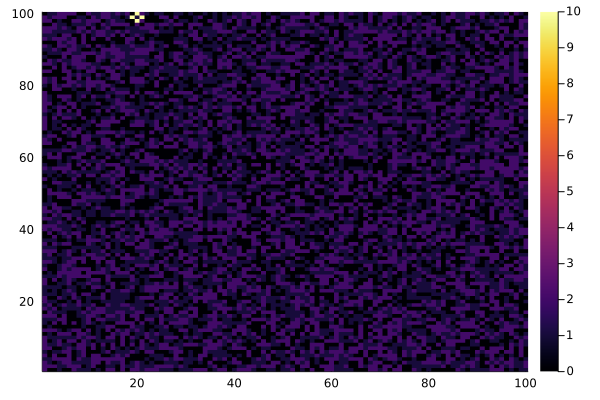

In [6]:
reshape_for_plot(mat) = permutedims(reshape(mat, (N, :)), [2, 1])[end:-1:1, :]

# Test
m_show = copy(m)

idx = 120
m_show[get_neighbor_idxs(idx)] .= 10

m_show = reshape_for_plot(m_show)
heatmap(m_show)

In [8]:
# Other required functions
function U(idx, neighbor_idxs, J=1, R=1)
    f(s, n_idx) = (J*(m[n_idx] == m[idx]) - R*(1 - m[n_idx] == m[idx]))*(1 - m[n_idx] == 0)
    reduce(f, neighbor_idxs)
end

U (generic function with 3 methods)

In [9]:
# Test
idx = 60
U(idx, get_neighbor_idxs(idx))

0

In [10]:
# Main
function do_move(idx, new_idx)
    m[new_idx] = m[idx]
    m[idx] = 0
end

rand_choice(array) = array[rand(1:length(array))]
rand_float() = rand(Uniform(0, 1))

function agent_move(idx, T=0.5)
    if m[idx] == 0; return; end;

    neighbor_idxs = get_neighbor_idxs(idx)
    empty_neighbors = neighbor_idxs[m[neighbor_idxs] .== 0]
    if length(empty_neighbors) == 0; return; end;
    
    new_idx = rand_choice(empty_neighbors)
    new_neighbor_idxs = get_neighbor_idxs(new_idx)

    new_neighbors = m[new_neighbor_idxs]
    neighbors = m[neighbor_idxs]

    # Move if more friendlies than currently
    my_type = m[idx]
    if count(==(my_type), new_neighbors) > count(==(my_type), neighbors)
        do_move(idx, new_idx)
        return
    end

    # Move based on U and random number
    p = exp((U(idx, neighbor_idxs) - U(new_idx, new_neighbor_idxs))/T)
    if rand_float() > p
        do_move(idx, new_idx)
        return
    end
end

# Test
agent_move(10)

At 100.0%

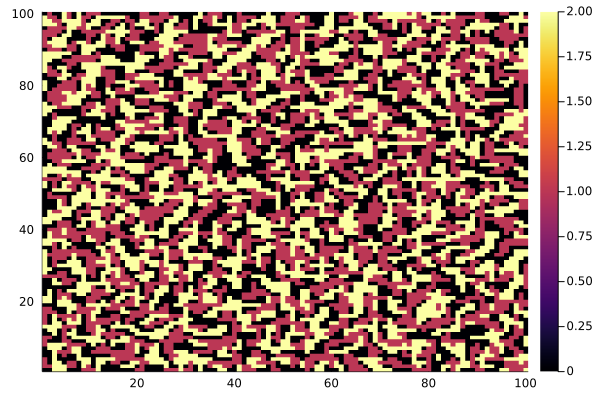

In [11]:
Random.seed!(42)
m = init()

n_steps = 500*size
for i in 0:n_steps
    if mod(i, Int(n_steps/100)) == 0; print("\rAt $(100*i/n_steps)%"); flush(stdout); end

    idx = rand(1:size)
    agent_move(idx)
end

heatmap(reshape_for_plot(m))